In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
census_income=pd.read_csv('census_income.csv')
census_income

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df=pd.DataFrame(census_income)
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


COLLECTING BASIC INFORMATION ABOUT THE DATASET

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

Separating the categorical and continous columns

In [8]:
cat=[]
cont=[]
for i in df.columns:
    if(df[i].dtypes=='object'):
        cat.append(i)
    else:
        cont.append(i)
cat

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [9]:
cont

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [10]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


ANALYSING THE CATEGORICAL DATA FIRST

In [11]:
df[cat]

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


COMPARING ALL THE CATEGORICAL COLUMNS WITH THE TARGET COLUMN(INCOME) AND DRAWING CONCLUSIONS FROM THE APPARENT OBSESERVATIONS THROUGH VISUALIZATION

<AxesSubplot:xlabel='Workclass', ylabel='count'>

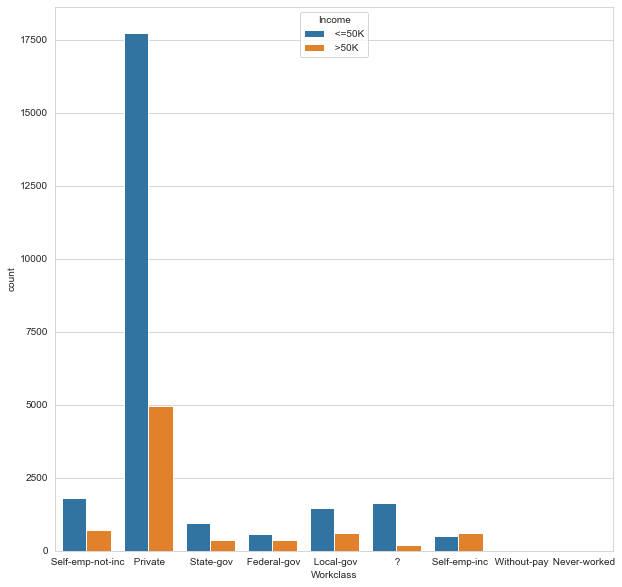

In [12]:
plt.figure(figsize=(10,10))
sns.set_style('whitegrid')
sns.countplot(x='Workclass',hue='Income',data=df)

OBSERVATIONS:
1: People working in in the private sector consitute the bulk of the WORKCLASS data
2: The self-employed-inc has the best figures of people earning more than 50k an year though their population is considerably small when compared to the ones working in the private sector.(<=50k:>50k ratio of 2:3 approx.)
3: The people under the working class unknown(?) have majority figures of people working under or at 50k an year.
3: The people working in the private sector had a ratio of(18:5)(<=50k:>50k) i.e 5 out of every 23 people here earn more than 50k an year and 18 below it.
4:All the people under different working classes have more people(almost double) earning <=50k an year than the ones earning more than it except the ones self-employed-inc.

<AxesSubplot:xlabel='Education', ylabel='count'>

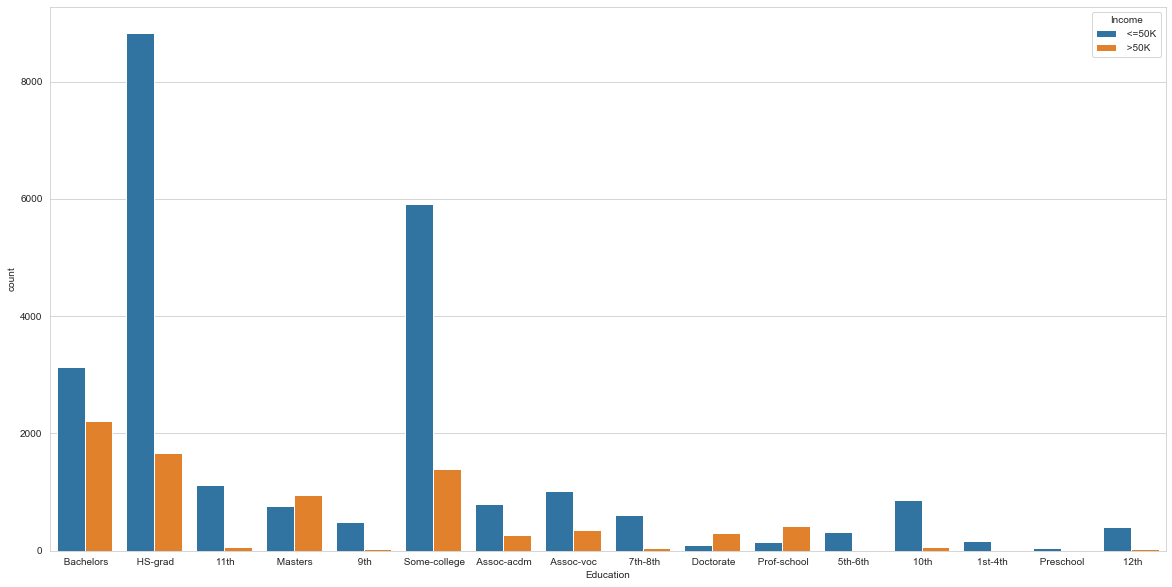

In [13]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.countplot(x='Education',hue='Income',data=df)

OBSERVATIONS:
PEOPLE WITH AN EDUCATIONAL QUALIFICATION OF HS-grad HAVE THE HIGHEST NUMBERS IN THE EDUCATION CLASS.
1:PEOPLE WITH AN EDUCATIONAL QUALIFICATION OF HS-grad have most people earning less than or equal to 50k an year with approximately 1 person earning more than 50k in every 6 people.
ratio (<=50k:>50k)=5:1
2:People with an educational qualification of Masters,Doctorate,Prof-school have more people earning over 50k an year than below it though they constitute a small part of the overall population.
CONCLUSION: THE INCOME IS DIRECTLY PROPOTIONAL TO THE EDUCATIONAL QUALIFICATION.

<AxesSubplot:xlabel='Marital_status', ylabel='count'>

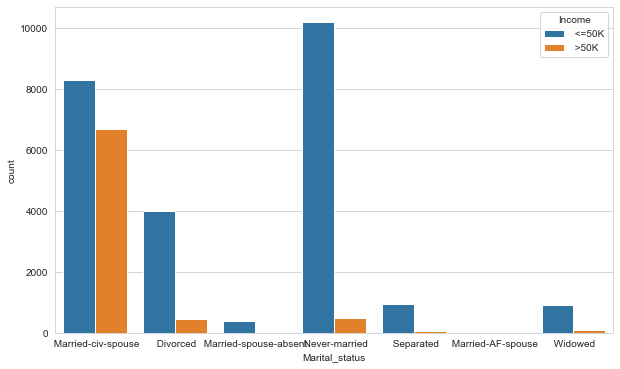

In [14]:
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.countplot(x='Marital_status',hue='Income',data=df)

OBSERVATIONS:
1: People married to civilian spouse have the best figures of an yearly income of over 50K with 7 people earning over 50k for every 8 that earn below it.
Ratio(<=50k:>50k)=8:7.
2:People with a marital status of 'Never-married' have majority of them earning<=50k an year with 20people earning<=50k in every 21 people.
ratio(<=50k:>50k)=1:20.
CONCLUSION: MARRIED PEOPLE LIVING WITH A CIVILIAN SPOUSE HAVE BETTER PROPOTION OF ONES EARNING MORE THAN 50K AN YEAR.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

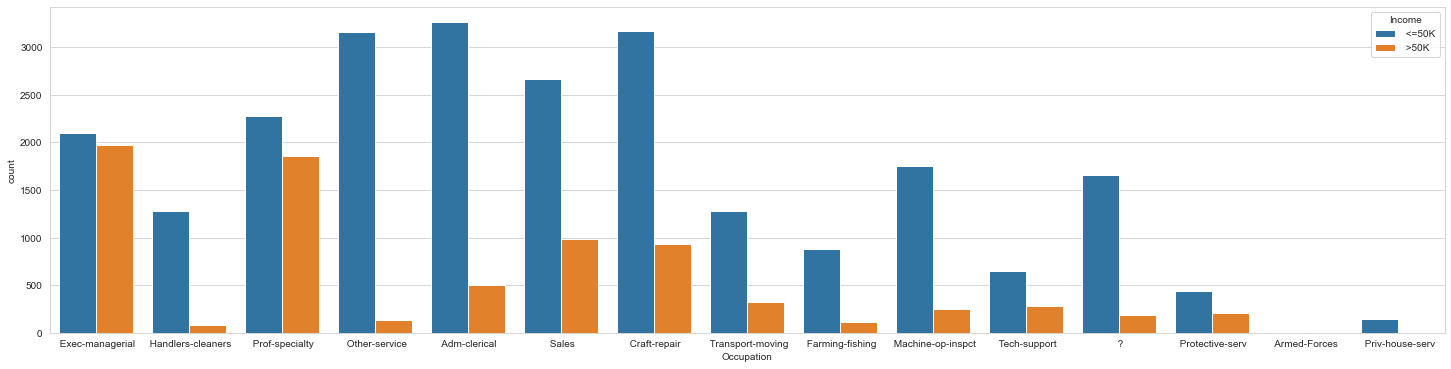

In [15]:
plt.figure(figsize=(25,6))
sns.set_style('whitegrid')
sns.countplot(x='Occupation',hue='Income',data=df)

OBSERVATIONS:
1: People in exec-managerial occupation have the highest propotion of people earning over 50k an year with 1 out of 2 people earning over 50k(approx.)
2:People in other services have the highest propotion of people earning <=50k with 1person earning over 50k for every 31 people that earn below it.(Approximately).
3: People in prof-speciality occupation have the second highest propotion of people earning over 50k an year with 9 people earning more than 50k in every 20 people.


<AxesSubplot:xlabel='Relationship', ylabel='count'>

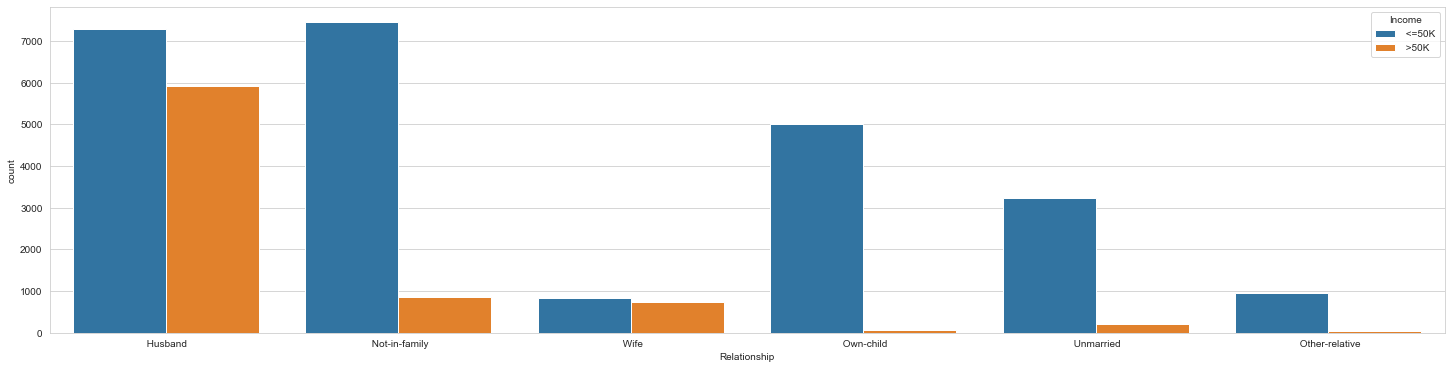

In [16]:
plt.figure(figsize=(25,6))
sns.set_style('whitegrid')
sns.countplot(x='Relationship',hue='Income',data=df)

OBSERVATIONS:
PEOPLE HAVING A relationship as HUSBAND HAVE THE HIGHEST NUMBERS IN THIS POPULATION SAMPLE
1)People having a relationship as husband had the second highest propotion of income over 50k with 6people earning more than 50k for every 7that earn below it out of every 13 people.
2)People having a reationship as wife had the highest propotion of income over 50k an year with almost a 1:1 ratio but their constitution of the population size is relatively small.
3)People with a relationship of own-child had the highest propotion of income <=50k with only one person earning over50k for every 50people that earn below it out of their population of 51.

<AxesSubplot:xlabel='Race', ylabel='count'>

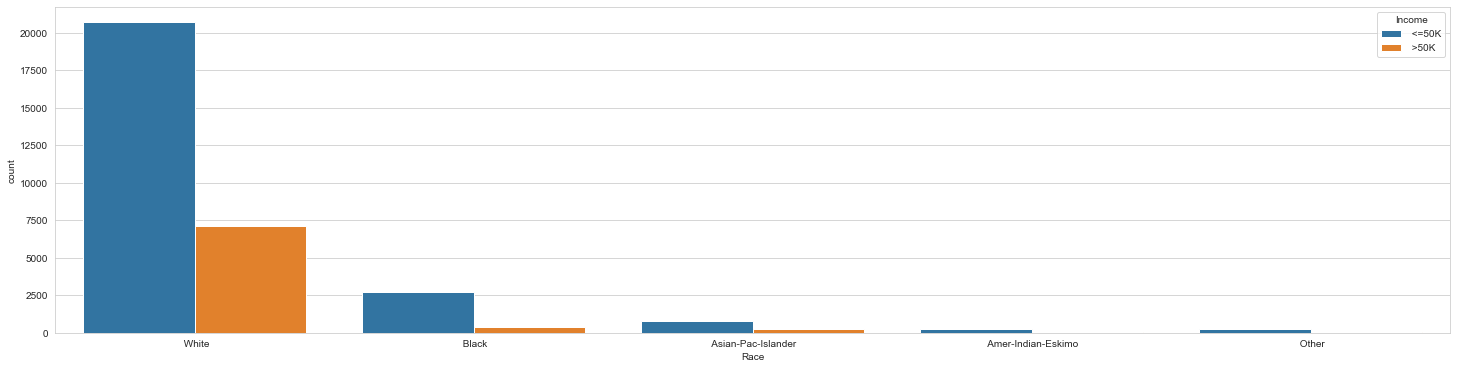

In [17]:
plt.figure(figsize=(25,6))
sns.set_style('whitegrid')
sns.countplot(x='Race',hue='Income',data=df)

OBSERVATION:
THE 'RACE' CLASS APPEARS INCONCLUSIVE AS NOT MUCH DIFFERENCE IN PROPOTIONS OF INCOME CATEGORY CAN BE SPOTTED IN THIS SAMPLE,ALTHOUGH THE BULK OF THE SAMPLE IS CONSTITUTED BY THE DATA OF THE 'WHITE' RACE.

<AxesSubplot:xlabel='Sex', ylabel='count'>

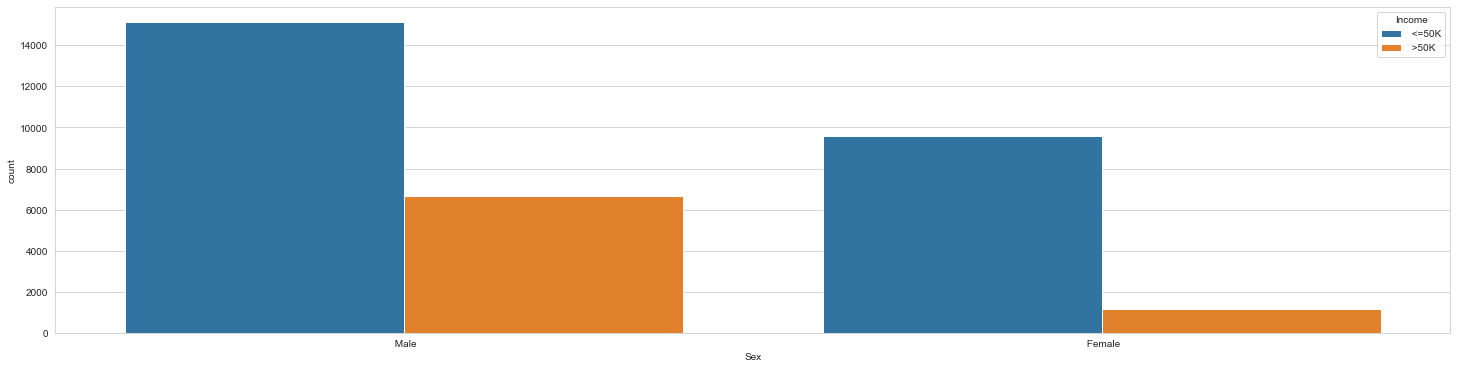

In [18]:
plt.figure(figsize=(25,6))
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='Income',data=df)

OBSERVATION:
    RATIO(<=50K:>50K MALE)=5:2
    RATIO(<=50K:>50K FEMALE)=9:1
    CONCLUSION: THE FEMALE POPULATION HAVE A GREATER PROPOTION OF PEOPLE WORKING OVER 50K AS COMPARED TO MALE.

<AxesSubplot:xlabel='Native_country', ylabel='count'>

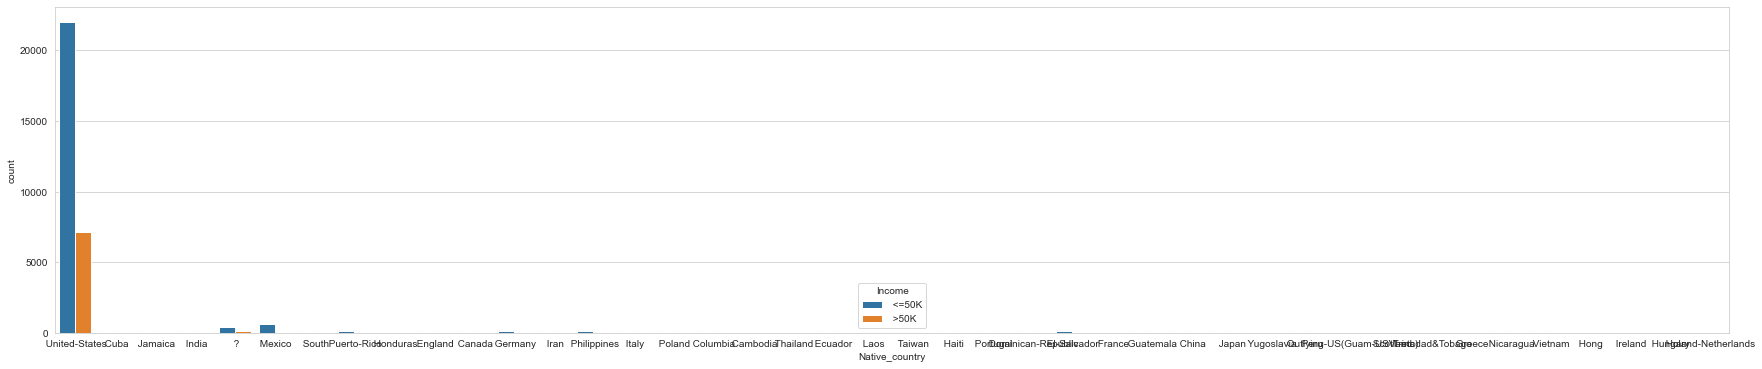

In [19]:
plt.figure(figsize=(30,6))
sns.set_style('whitegrid')
sns.countplot(x='Native_country',hue='Income',data=df)

NOT MUCH CAN BE INFERRED FROM THIS DATA AS BULK OF THE POPULATION IS FROM UNITED STATES ONLY.

<AxesSubplot:xlabel='Education_num', ylabel='count'>

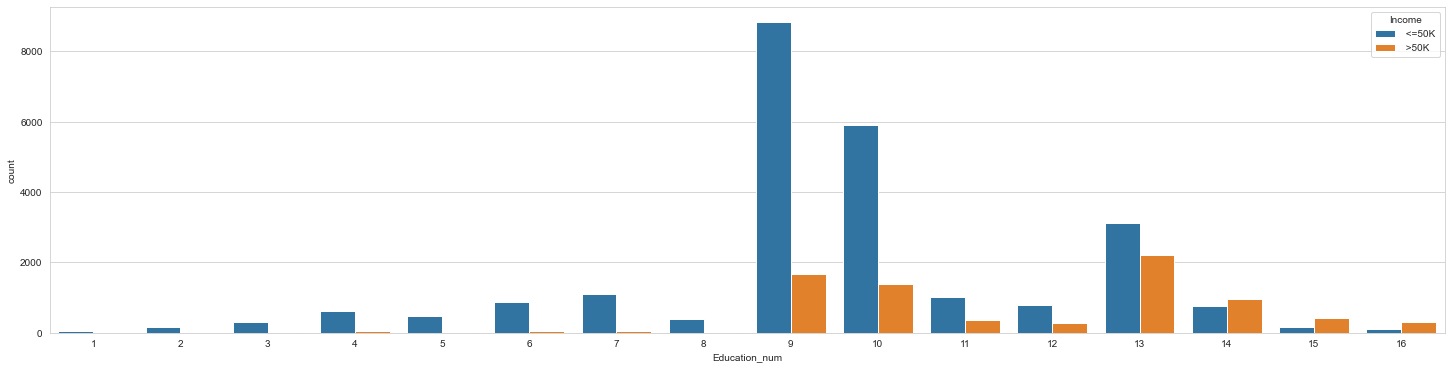

In [20]:
plt.figure(figsize=(25,6))
sns.set_style('whitegrid')
sns.countplot(x='Education_num',hue='Income',data=df)

THE EDUCATION COLUMN AND THE EDUCATION_NUM COLUMN APPEAR TO BE PROVIDING THE SAME INFORMATION.
DROPPING THE EDUCATION COLUMN.

In [21]:
df.drop('Education',axis=1,inplace=True)

In [22]:
cat.pop(1)

'Education'

In [23]:
df[cat].nunique()

Workclass          9
Marital_status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native_country    42
Income             2
dtype: int64

In [24]:
df[cat].head()

,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


PROCEEDING TO ENCODING THE NOMINAL AND THE ORDINAL DATA

In [25]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [26]:
#encoding
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
enc=OneHotEncoder()
le=LabelEncoder()
for i in df[cat]:
    if(i=='Sex')or(i=='Income'):
        
        df[i] =enc.fit_transform(df[[i]]).toarray()
    else:
        df[i]=le.fit_transform(df[i])

    
    
    
df[cat].head()

,Workclass,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,6,2,4,0,4,0.0,39,1.0
1,4,0,6,1,4,0.0,39,1.0
2,4,2,6,0,2,0.0,39,1.0
3,4,2,10,5,2,1.0,5,1.0
4,4,2,4,5,4,1.0,39,1.0


In [27]:
df[cat].nunique()

Workclass          9
Marital_status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native_country    42
Income             2
dtype: int64

PROCEEDING TO ANALYSING THE CONTINOUS DATA

<AxesSubplot:>

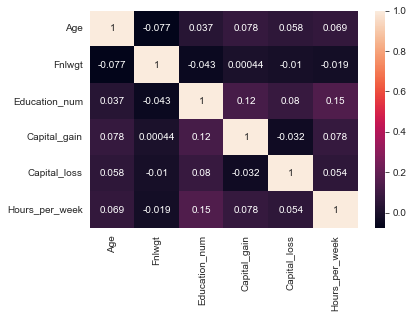

In [28]:
sns.heatmap(df[cont].corr(),annot=True)

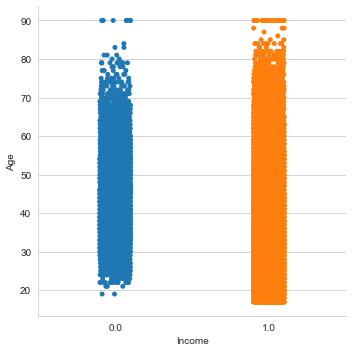

In [29]:
sns.catplot(y='Age',x='Income',data=df)

In [30]:
df[cont].head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


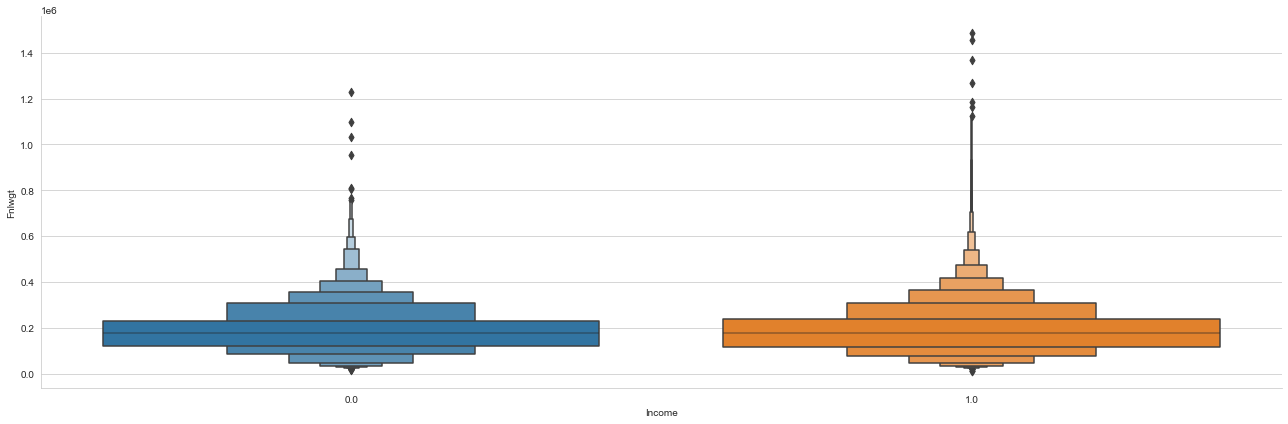

In [31]:
sns.catplot(y='Fnlwgt',x='Income',data=df.sort_values('Fnlwgt',ascending=False),kind='boxen',height=6,aspect=3)

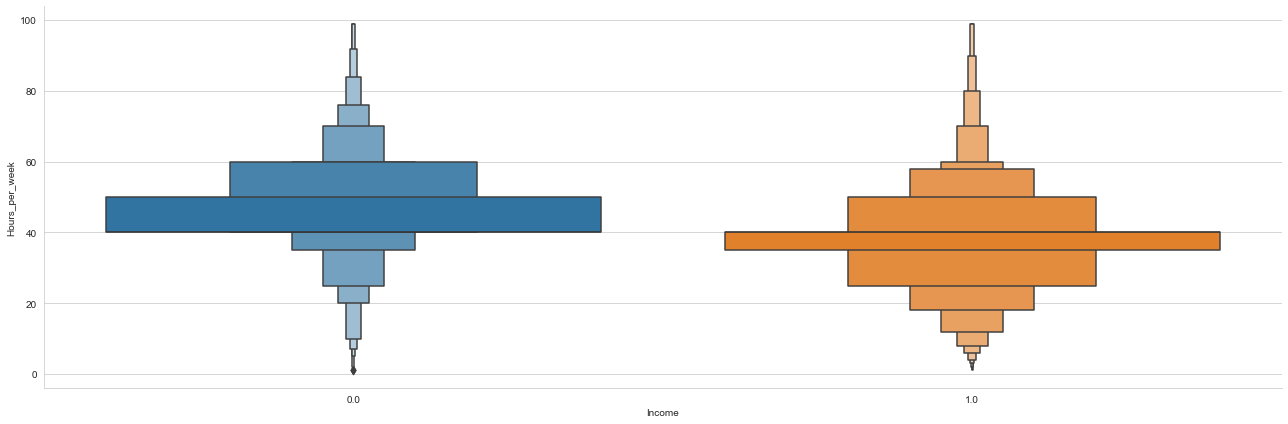

In [32]:
sns.catplot(y='Hours_per_week',x='Income',data=df.sort_values('Hours_per_week',ascending=False),kind='boxen',height=6,aspect=3)

THE BIGGEST CHUNK OF THE PEOPLE EARNING OVER 50K AN YEAR WORK AROUND 35-40 HOURS PER WEEK.
CHUNK OF THE PEOPLE EARNING BELOW 50K AN YEAR WORK FOR 40-50 HOURS PER WEEK.

In [33]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,0.0,0,0,13,39,1.0
1,38,4,215646,9,0,6,1,4,0.0,0,0,40,39,1.0
2,53,4,234721,7,2,6,0,2,0.0,0,0,40,39,1.0
3,28,4,338409,13,2,10,5,2,1.0,0,0,40,5,1.0
4,37,4,284582,14,2,4,5,4,1.0,0,0,40,39,1.0


In [34]:
df[cont].skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

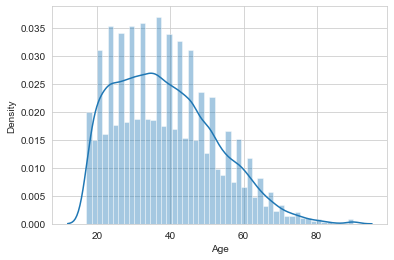

Age


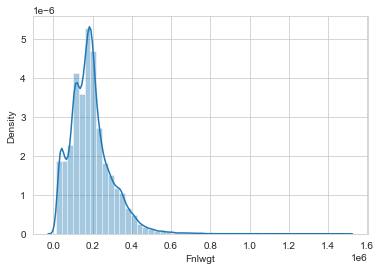

Fnlwgt


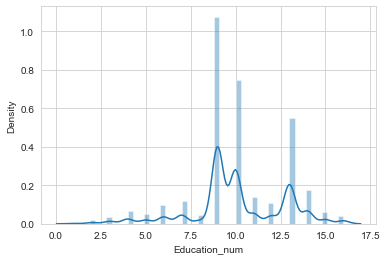

Education_num


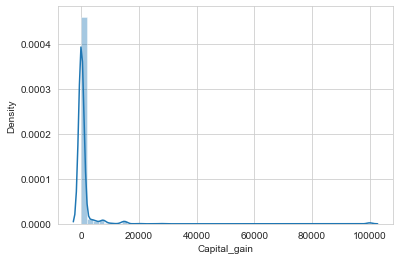

Capital_gain


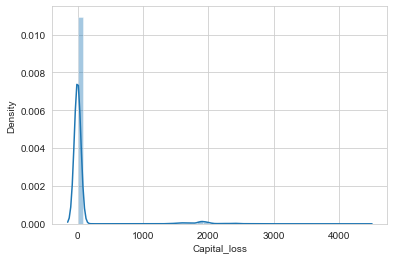

Capital_loss


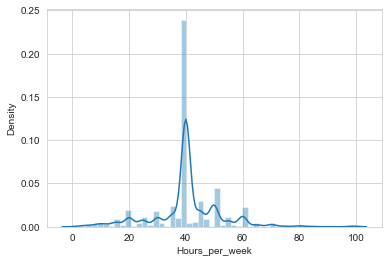

Hours_per_week


In [35]:
for i in df[cont]:
    sns.distplot(df[i])
    plt.show()
    print(i)

THE COLUMNS CAPITAL GAIN AND CAPITAL LOSS SHOW LARGE AMOUNT OF SKEWNESS

In [36]:
df['Capital_gain']=np.sqrt(df['Capital_gain'])
df['Capital_loss']=np.sqrt(df['Capital_loss'])


In [37]:
df[cont].skew()

Age               0.558738
Fnlwgt            1.446972
Education_num    -0.311630
Capital_gain      5.894949
Capital_loss      4.376279
Hours_per_week    0.227636
dtype: float64

In [38]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,0.0,0.0,0.0,13,39,1.0
1,38,4,215646,9,0,6,1,4,0.0,0.0,0.0,40,39,1.0
2,53,4,234721,7,2,6,0,2,0.0,0.0,0.0,40,39,1.0
3,28,4,338409,13,2,10,5,2,1.0,0.0,0.0,40,5,1.0
4,37,4,284582,14,2,4,5,4,1.0,0.0,0.0,40,39,1.0


PROCEEDING TO THE TRAINING AND TESTING(MACHINE LEARNING) PHASE

In [39]:
x=df.drop('Income',axis=1)
y=df['Income']

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

LOGISTIC REGRESSION

In [42]:
log=LogisticRegression()
log.fit(x_train,y_train)
pred_log=log.predict(x_test)
print('accuracy score',accuracy_score(y_test,pred_log))
print(confusion_matrix(y_test,pred_log))
print(classification_report(y_test,pred_log))


accuracy score 0.7848301535597952
[[ 552 2077]
 [ 235 7881]]
              precision    recall  f1-score   support

         0.0       0.70      0.21      0.32      2629
         1.0       0.79      0.97      0.87      8116

    accuracy                           0.78     10745
   macro avg       0.75      0.59      0.60     10745
weighted avg       0.77      0.78      0.74     10745



DECISION TREE CLASSIFIER

In [43]:
from sklearn.tree import DecisionTreeClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_dtc))
print("confusion matrix:",confusion_matrix(y_test,pred_dtc))
print("classification report:",classification_report(y_test,pred_dtc))

accuracy_score: 0.8024197301070265
confusion matrix: [[1589 1040]
 [1083 7033]]
classification report:               precision    recall  f1-score   support

         0.0       0.59      0.60      0.60      2629
         1.0       0.87      0.87      0.87      8116

    accuracy                           0.80     10745
   macro avg       0.73      0.74      0.73     10745
weighted avg       0.80      0.80      0.80     10745



RANDOM FOREST CLASSIFIER

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=42)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_rfc))
print("confusion matrix:",confusion_matrix(y_test,pred_rfc))
print("classification report:",classification_report(y_test,pred_rfc))

accuracy_score: 0.8519311307584924
confusion matrix: [[1682  947]
 [ 644 7472]]
classification report:               precision    recall  f1-score   support

         0.0       0.72      0.64      0.68      2629
         1.0       0.89      0.92      0.90      8116

    accuracy                           0.85     10745
   macro avg       0.81      0.78      0.79     10745
weighted avg       0.85      0.85      0.85     10745



KNEIGHBORSCLASSIFIER

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train,y_train)
pred_knc=knc.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,pred_knc))
print("confusion matrix:",confusion_matrix(y_test,pred_knc))
print("classification report:",classification_report(y_test,pred_knc))


accuracy_score: 0.7396928804094928
confusion matrix: [[ 415 2214]
 [ 583 7533]]
classification report:               precision    recall  f1-score   support

         0.0       0.42      0.16      0.23      2629
         1.0       0.77      0.93      0.84      8116

    accuracy                           0.74     10745
   macro avg       0.59      0.54      0.54     10745
weighted avg       0.69      0.74      0.69     10745



SUPPORT VECTOR MACHINE

In [46]:
#from sklearn.svm import SVC


    
#svc2=SVC()
#svc2.fit(x_train,y_train)
#pred_svc2=svc2.predict(x_test)
#print('accuracy_score:',accuracy_score(y_test,pred_svc2))
#print("confusion matrix:",confusion_matrix(y_test,pred_svc2))
#print("classification report:",classification_report(y_test,pred_svc2))

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
cv_1=cross_val_score(log,x,y,cv=5)
print("mean score:",cv_1.mean())
print("cross val score:",cv_1)

mean score: 0.78762285012285
cross val score: [0.78808354 0.78316953 0.79023342 0.78378378 0.79284398]


In [49]:
cv_2=cross_val_score(knc,x,y,cv=10)
print("mean score:",cv_2.mean())
print("cross val score:",cv_2)

mean score: 0.7461302211302211
cross val score: [0.73894349 0.745086   0.74815725 0.75092138 0.74539312 0.74785012
 0.74969287 0.74692875 0.74846437 0.73986486]


In [50]:
cv_3=cross_val_score(dtc,x,y,cv=10)
print("mean score:",cv_3.mean())
print("cross val score:",cv_3)

mean score: 0.813144963144963
cross val score: [0.80804668 0.81388206 0.81203931 0.80773956 0.81941032 0.80712531
 0.80835381 0.82002457 0.82217445 0.81265356]


In [51]:
#cv_4=cross_val_score(svc2,x,y,cv=10)
#print("mean score:",cv_4.mean())
#print("cross val score:",cv_4)

In [52]:
cv_5=cross_val_score(rfc,x,y,cv=10)
print("mean score:",cv_5.mean())
print("cross val score:",cv_5)

mean score: 0.8535626535626536
cross val score: [0.84981572 0.85472973 0.85288698 0.83998771 0.85933661 0.85534398
 0.85472973 0.85565111 0.85902948 0.85411548]


RANDOM FOREST CLASSIFIER PERFORMED THE BEST

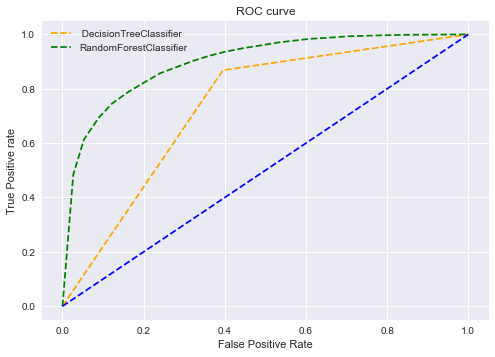

In [53]:
from sklearn.metrics import roc_curve
model1 = DecisionTreeClassifier()
# knn
model2 =RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=42)


# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label=' DecisionTreeClassifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

RANDOM FOREST CLASSIFIER  DID A BETTER JOB IN CLASSIFYING POSITIVE CLASS IN THE DATASET.

PROCEEDING TO SAVING THE MODEL

In [54]:
import pickle
filename2='census_income_pred.sav'
pickle.dump(rfc,open(filename2,'wb'))

LOADING THE MODEL AGAIN FOR TESTING

In [55]:
load_model2=pickle.load(open(filename2,'rb'))
result=load_model2.score(x_train,y_train)
result

0.9977079990831996

In [56]:
testing=load_model2.predict(x_test[0:4])
testing

array([1., 1., 0., 0.])

In [57]:
x_test[0:4]


,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
14160,38,4,680390,9,0,1,4,4,1.0,0.0,0.0,20,39
27047,45,7,50567,9,2,4,5,4,1.0,0.0,0.0,40,39
28867,29,4,185908,13,2,4,0,2,0.0,0.0,0.0,55,39
5667,51,4,306108,16,4,10,1,4,0.0,0.0,0.0,40,39


In [58]:
y_test[0:4]

14160    1.0
27047    1.0
28867    0.0
5667     0.0
Name: Income, dtype: float64

THE MODEL PREDICTED ALL THE 4 COLUMNS CORRECTLY

JUST A DEPICTION OF HYPERPARAMETER TUNING FOR RANDOM FOREST CLASSIFIER ALTHOUGH NOT MUCH DIFFERENCE IN ACCURACY WAS DETECTED.

In [59]:
from sklearn.model_selection import GridSearchCV

In [62]:
param_grid = [
{'n_estimators': [10, 25], 'max_features': [5, 10], 
 'max_depth': [10, 50, None], 'bootstrap': [True, False]}
]

grid_search_forest = GridSearchCV(rfc, param_grid, cv=10)
grid_search_forest.fit(x_train, y_train)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=20,
                                              random_state=42),
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [10, 25]}])

In [65]:
print(grid_search_forest.best_score_)

0.8595913545489733


In [66]:
print(grid_search_forest.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=5,
                       n_estimators=25, random_state=42)


In [68]:
print(grid_search_forest.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 25}


END OF WORKSHEET